In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
from Scripts import project_functions # This is called a relative import
df = project_functions.load_and_process("acs2017_county_data.csv")
df


,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Production,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,6001,California,Alameda County,1629615,799649,829966,22.5,32.2,10.7,0.3,...,9.2,3.6,6.0,32.5,826310,79.3,13.2,7.3,0.1,6.0
1,6003,California,Alpine County,1203,664,539,9.7,64.6,1.5,20.6,...,8.3,1.6,14.0,21.9,374,58.6,30.2,11.2,0.0,14.6
2,6005,California,Amador County,37306,20005,17301,13.2,79.3,2.0,0.7,...,10.1,1.1,6.4,32.0,13444,63.9,21.0,14.7,0.4,9.3
3,6007,California,Butte County,225207,111587,113620,15.7,72.9,1.5,0.7,...,10.1,3.9,5.7,20.1,93439,72.8,17.2,9.7,0.4,9.1
4,6009,California,Calaveras County,45057,22292,22765,11.5,82.0,0.6,0.9,...,11.5,0.6,8.3,35.5,16721,67.6,18.2,13.7,0.4,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,48499,Texas,Wood County,43315,21523,21792,9.6,83.2,5.5,0.6,...,14.1,1.0,5.6,30.2,15960,78.4,14.1,7.1,0.4,7.8
437,48501,Texas,Yoakum County,8481,4286,4195,65.0,33.2,0.0,0.2,...,14.4,0.2,1.3,16.2,3755,71.7,17.5,10.7,0.1,7.5
438,48503,Texas,Young County,18166,8922,9244,18.1,78.8,1.5,0.5,...,13.7,1.4,6.1,15.3,8248,69.8,17.1,11.9,1.2,4.5
439,48505,Texas,Zapata County,14415,7190,7225,94.1,5.2,0.0,0.0,...,20.2,0.6,2.0,18.2,5146,66.0,21.0,12.6,0.4,12.4


In [4]:
percent_form =['Men','Women']
df[percent_form]=df[percent_form].div(df["TotalPop"], axis="index")*100
df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Production,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,6001,California,Alameda County,1629615,49.069811,50.930189,22.5,32.2,10.7,0.3,...,9.2,3.6,6.0,32.5,826310,79.3,13.2,7.3,0.1,6.0
1,6003,California,Alpine County,1203,55.195345,44.804655,9.7,64.6,1.5,20.6,...,8.3,1.6,14.0,21.9,374,58.6,30.2,11.2,0.0,14.6
2,6005,California,Amador County,37306,53.624082,46.375918,13.2,79.3,2.0,0.7,...,10.1,1.1,6.4,32.0,13444,63.9,21.0,14.7,0.4,9.3
3,6007,California,Butte County,225207,49.548637,50.451363,15.7,72.9,1.5,0.7,...,10.1,3.9,5.7,20.1,93439,72.8,17.2,9.7,0.4,9.1
4,6009,California,Calaveras County,45057,49.475109,50.524891,11.5,82.0,0.6,0.9,...,11.5,0.6,8.3,35.5,16721,67.6,18.2,13.7,0.4,7.1


In [5]:
df.describe(exclude=np.object).T


,count,mean,std,min,25%,50%,75%,max
CountyId,441.0,35492.684807,17083.051102,6001.000000,12105.000000,48067.000000,48287.000000,4.850700e+04
TotalPop,441.0,241449.283447,693148.227348,74.000000,12972.000000,40544.000000,155719.000000,1.010572e+07
Men,441.0,50.784517,3.124519,45.444319,49.069811,49.813251,51.328904,6.796267e+01
Women,441.0,49.215483,3.124519,32.037325,48.671096,50.186749,50.930189,5.455568e+01
Hispanic,441.0,26.996825,22.393134,1.500000,9.600000,20.600000,39.200000,9.920000e+01
White,441.0,61.559864,21.608888,0.600000,47.200000,64.800000,77.600000,9.580000e+01
Black,441.0,6.901814,7.443716,0.000000,1.500000,4.500000,9.700000,5.530000e+01
Native,441.0,0.521769,1.336473,0.000000,0.100000,0.200000,0.500000,2.060000e+01
Asian,441.0,2.126757,4.176929,0.000000,0.300000,0.800000,1.900000,3.490000e+01
Pacific,441.0,0.091156,0.243065,0.000000,0.000000,0.000000,0.100000,3.400000e+00


In [6]:
df.describe(exclude=np.number).T

,count,unique,top,freq
State,441,4,Texas,254
County,441,409,Orange County,4


### Boxplot of Income V/S State

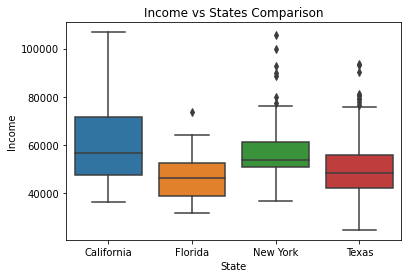

In [7]:
ax = sns.boxplot(y="Income", x ="State", data = df).set_title("Income vs States Comparison")
fig = ax.get_figure()
fig.savefig("images/fig1.png")

### Barplot of total population per State 

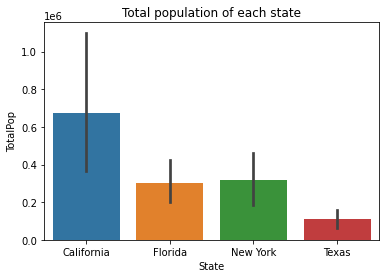

In [8]:
ax = sns.barplot(x = "State", y = "TotalPop",data = df).set_title("Total population of each state")
fix = ax.get_figure()
fig.savefig("images/fig2.png")

In [9]:
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Income Per Capita VS State Comparison 

This seems more valid as income per capita is the measure of amount of money earned per person rather than of the state as a whole
As seen the population of all of these 4 states are quite different in size checking the income of a state as whole doesn't make sense
ineteresting how the income per cap for California and New York are similar
Similarly, income per capita for Texas and Florida are similar


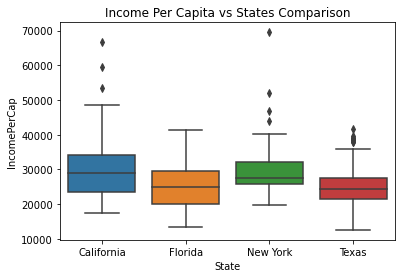

In [10]:
ax = sns.boxplot(y="IncomePerCap", x ="State", data = df).set_title("Income Per Capita vs States Comparison")
fig = ax.get_figure()
fig.savefig("images/fig3.png")

print(color.BOLD + "This seems more valid as income per capita is the measure of amount of money earned per person rather than of the state as a whole" + color.END)
print(color.BOLD +"As seen the population of all of these 4 states are quite different in size checking the income of a state as whole doesn't make sense"+ color.END)
print(color.BOLD + color.UNDERLINE + "ineteresting how the income per cap for California and New York are similar" + color.END)
print(color.BOLD + color.UNDERLINE +"Similarly, income per capita for Texas and Florida are similar" + color.END)

### Correlation between Poverty and Child Poverty

In [11]:
print(df[['Poverty','ChildPoverty']].corr())

print(color.BOLD + "Not Suprisingly Child Poverty Rate and Poverty Rates are correlated" + color.END)

               Poverty  ChildPoverty
Poverty       1.000000      0.904335
ChildPoverty  0.904335      1.000000
Not Suprisingly Child Poverty Rate and Poverty Rates are correlated


### Poverty Rates Per State

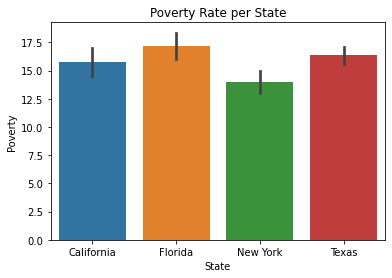

In [12]:

ax = sns.barplot(x=df['State'],y=df['Poverty']).set_title("Poverty Rate per State")
fig = ax.get_figure()
fig.savefig("images/fig4.png")
